In [1]:
# Load some packages
import numpy as np
import matplotlib.pyplot as plt
import time
import operator
import random
from mpl_toolkits.mplot3d import Axes3D
import powerlaw
import seaborn as sns
import scipy
import collections
import networkx as nx

In [2]:
def adjacent_edges(nodes, k):
    n = len(nodes)
    for i, k in enumerate(nodes):
        for j in range(i+1, i+k+1):
            l = nodes[j % n]
            yield k, l


def make_ring_lattice(n=50, k=10):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    fig = plt.figure(figsize=(10,8))
    nx.draw(G,node_color = "skyblue",with_labels = True)
    plt.show()
    
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)


    plt.show()
    
    return G

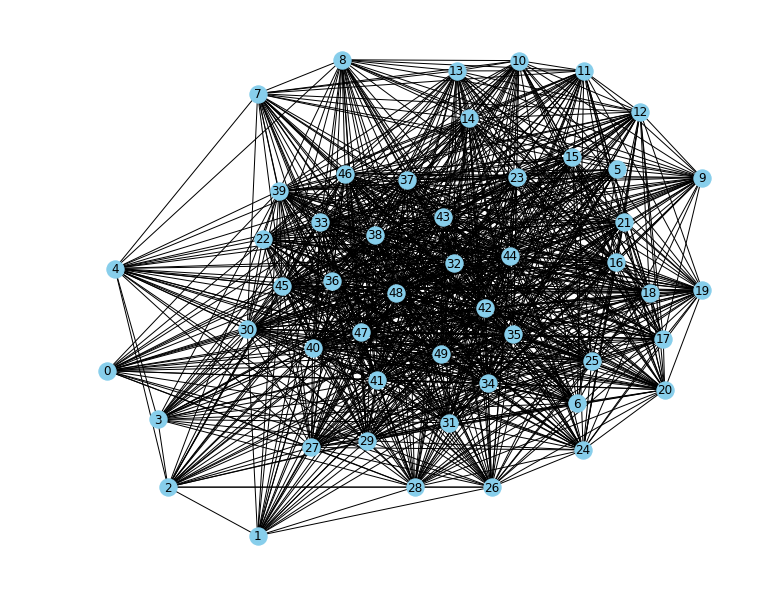

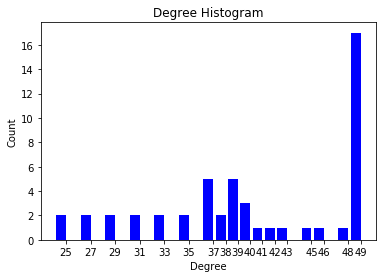

In [3]:
G = make_ring_lattice()

In [4]:
def rewire(G, p):
    nodes = set(G)
    for u, v in G.edges():
        if np.random.random() < p:
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(u, new_v)
    fig = plt.figure(figsize=(10,8))
    nx.draw(G,node_color = "skyblue",with_labels = True)
    plt.show()
    
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color=['goldenrod', 'lightcoral','brown', 'sandybrown','aquamarine','mediumseagreen', 'royalblue', 'powderblue','mediumpurple'])
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)


    plt.show()
    
    return G
        

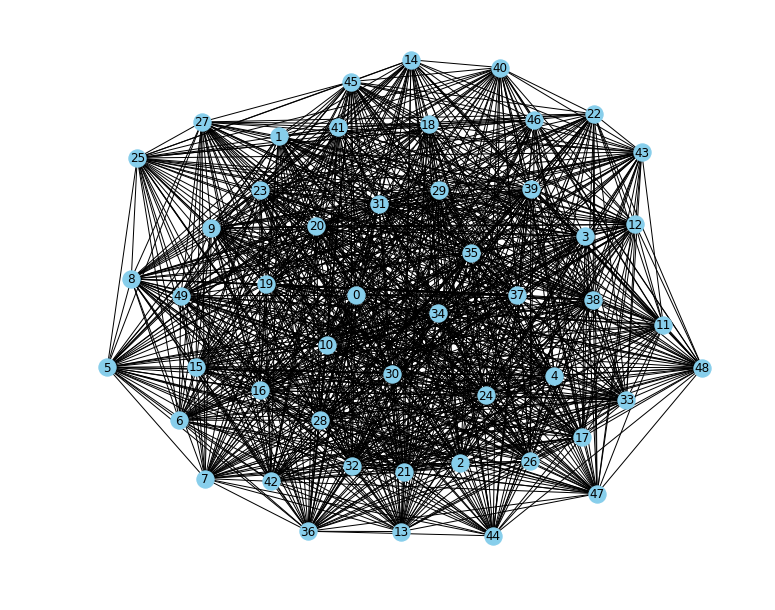

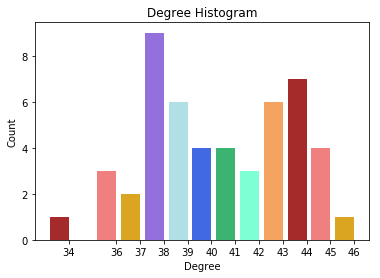

In [5]:
R1=rewire(G,0.3)

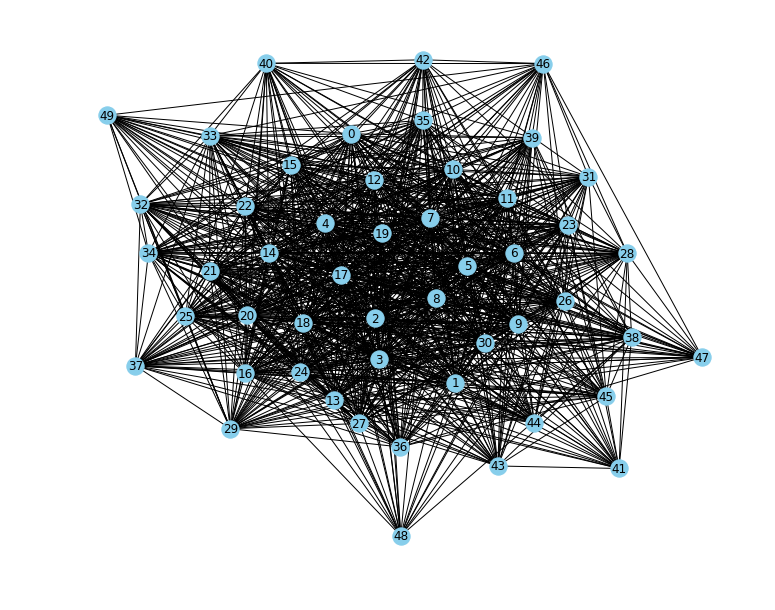

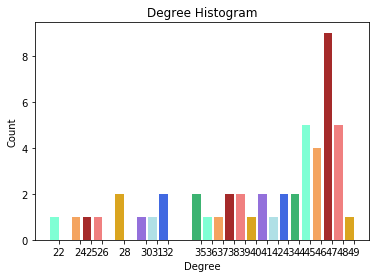

In [6]:
R2=rewire(G,0.9)